<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza


# Redução de Dimensionalidade

## 1. Leitura dos dados (Iris Dataset)


In [18]:
import pandas as pd

path_iris_csv = "../../data/iris.csv"

df = pd.read_csv(path_iris_csv)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## 2. Métodos

### 2.1 PCA (Análise de Componentes Principais)

```python
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
```

In [19]:
import numpy as np

X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].to_numpy()

np.shape(X)

(150, 4)

In [20]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X)

df_new = pd.DataFrame(data=pca, columns=["pc1", "pc2"])

df_new["labels"] = df["variety"]

In [22]:
pca[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [23]:
df_new

,pc1,pc2,labels
0,-2.684126,0.319397,Setosa
1,-2.714142,-0.177001,Setosa
2,-2.888991,-0.144949,Setosa
3,-2.745343,-0.318299,Setosa
4,-2.728717,0.326755,Setosa
...,...,...,...
145,1.944110,0.187532,Virginica
146,1.527167,-0.375317,Virginica
147,1.764346,0.078859,Virginica
148,1.900942,0.116628,Virginica


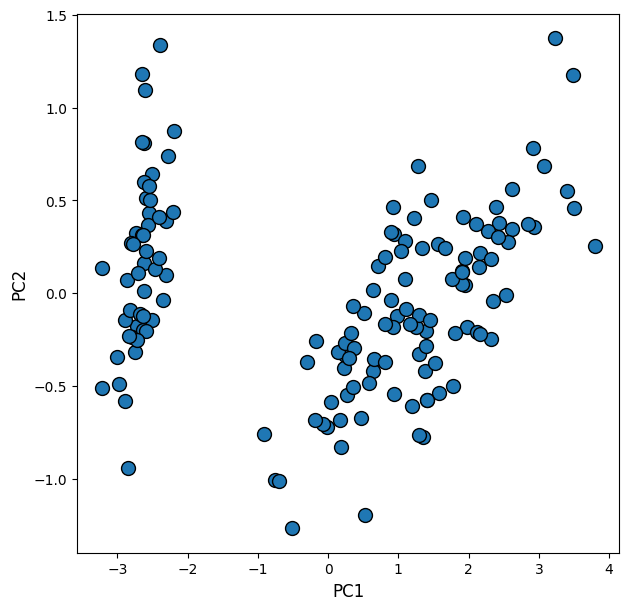

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

plt.scatter(df_new["pc1"], df_new["pc2"], s=100, edgecolors="black")

plt.xlabel("PC1", fontdict={"size": 12})
plt.ylabel("PC2", fontdict={"size": 12})

plt.show()

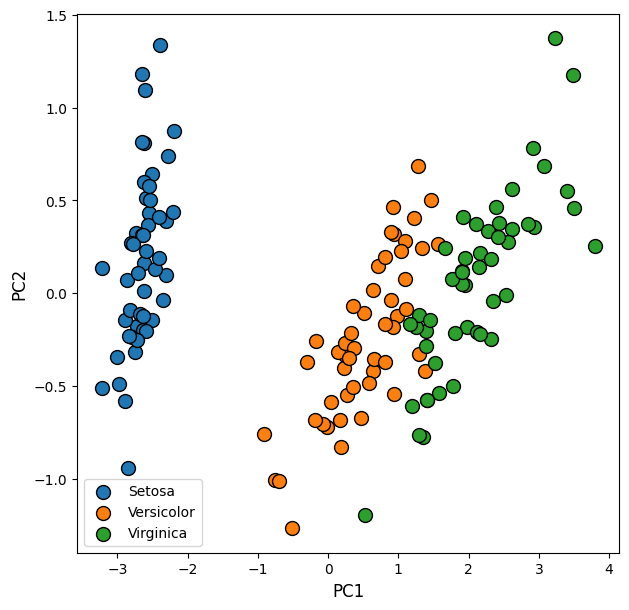

In [25]:
plt.figure(figsize=(7, 7))

for lbl in df_new["labels"].unique():

    c = df_new[df_new["labels"] == lbl]

    plt.scatter(c["pc1"], c["pc2"], s=100, edgecolors="black")

plt.legend(df_new["labels"].unique())

plt.xlabel("PC1", fontdict={"size": 12})
plt.ylabel("PC2", fontdict={"size": 12})

plt.show()

http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-individuals-factor-map-color-by-groups-1.png


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

pca = PCA(n_components=3)

components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components,
    x=0,
    y=1,
    z=2,
    color=df["species"],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
)

fig.show()

In [27]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

boston = load_diabetes()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
)

In [28]:
df.shape

(442, 10)

### 2.2 TSNE (T-distributed Stochastic Neighbor Embedding)

class sklearn.manifold.TSNE(n_components=2, \*, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)


In [29]:
import numpy as np
import pandas as pd

df = pd.read_csv(path_iris_csv)

# df.head()

X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].to_numpy()

np.shape(X)

(150, 4)

In [30]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [31]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=50, random_state=67677).fit_transform(X)
df_new = pd.DataFrame(data=X_embedded, columns=["pc1", "pc2"])
df_new["labels"] = df["variety"]

df_new

,pc1,pc2,labels
0,-12.716257,1.022901,Setosa
1,-11.965117,0.715622,Setosa
2,-12.005564,1.306920,Setosa
3,-11.863273,1.308692,Setosa
4,-12.713225,1.438813,Setosa
...,...,...,...
145,7.177941,-0.463731,Virginica
146,5.803360,-1.122746,Virginica
147,6.688363,-0.688369,Virginica
148,7.199845,-0.334302,Virginica


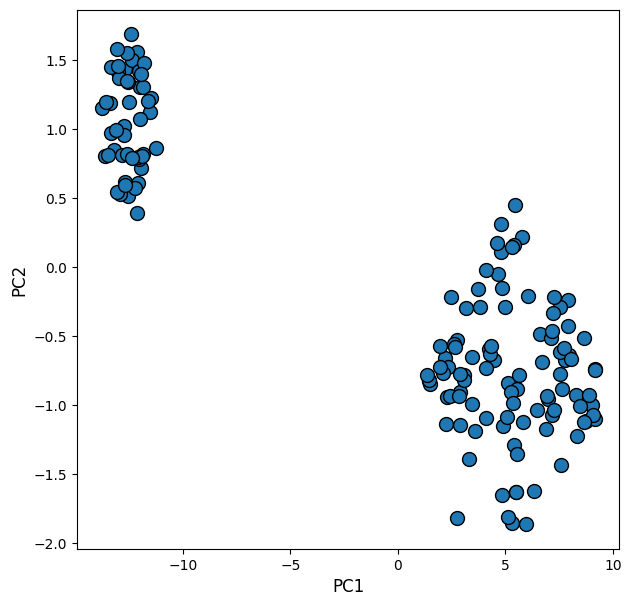

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(df_new["pc1"], df_new["pc2"], s=100, edgecolors="black")
plt.xlabel("PC1", fontdict={"size": 12})
plt.ylabel("PC2", fontdict={"size": 12})

plt.show()

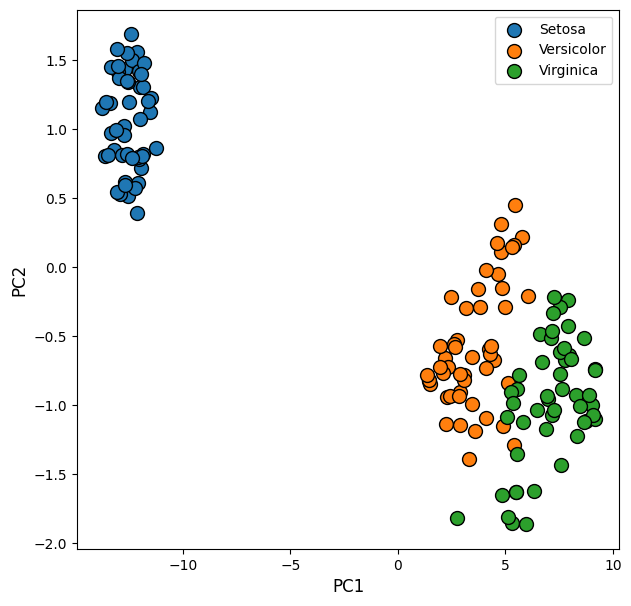

In [33]:
plt.figure(figsize=(7, 7))

for lbl in df_new["labels"].unique():
    c = df_new[df_new["labels"] == lbl]
    plt.scatter(c["pc1"], c["pc2"], s=100, edgecolors="black")

plt.legend(df_new["labels"].unique())
plt.xlabel("PC1", fontdict={"size": 12})
plt.ylabel("PC2", fontdict={"size": 12})

plt.show()

In [34]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :"petal_width"]

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(
    features,
)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2, color=df.species, labels={"color": "variety"}
)

fig.update_traces(marker_size=8)
fig.show()